# Part 1: Explorative Data Analysis
1. Find the time span of the order data.

2. Find the number of orders each day.

    a.Boss: we need to design two different strategies for sales in workdays and sales in weekends. 
    True or False? Explain.

3. Find the number of users.

4. Find ten commodities with the highest sales.

    a.Python Users Only : Draw graphs with x-axis the commodity name and y-axis the # of orders.

5. Find the discount rate of each order and concat it onto the original dataset with column name discount_rate. You may use pay_money, coffeestore_share_money, commodity_origin_money and commodity_income.

6. Find the average discount of each week. One week should consist of Sunday to Saturday.

7. Find the Retention Rate of any five days. It is the ratio of users purchasing again on the next day. For example, if you want to compute the Retention Rate on 2019-02-10, then you need to find users who bought goods on 02-09 and 02-10.

8. Find the Week Retention Rate of any day, which means finding users buying at that day and buying again within the next seven days.

9. Find the Week Retention Rate of any day for new users , which means finding users buying at that day for the first time and buying again within the next seven days.

10. Find the Retention Rate WITHIN one week of new users. You could choose any week you want, but it must consist of Sunday to Saturday. You need to find users buying the first product and buying again within that week.

11. Find “Active Users” (which means the number of orders of one user is greater equal to 5).

12. Write the table you get in 11 as a csv file with filename ActiveUser.csv.

13. Provide a description of the number of orders for each active user (# of ActiveUser, mean, range)

    a.Python Users Only : Find the std, variance, skewness and kurtosi

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  # 中文字体设置-黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题
sns.set(font='SimHei')
from dateutil import rrule
from datetime import datetime
import time

In [3]:
#1
data=pd.read_csv(r'C:\Users\rcf\Desktop\WISERCLUB\WISERCLUB\data.csv',encoding = "UTF-8")
data1=data.loc[:,'dt'].copy()
np.min(data1)
np.max(data1)

'2019-01-20'

'2019-03-01'

In [4]:
#2
data2=data.copy()
data2['number of orders']=1
data.groupby('dt').count().loc[:,'phone_no']

dt
2019-01-20     69859
2019-01-21    117686
2019-01-22    118409
2019-01-23    126331
2019-01-24    125764
2019-01-25    122092
2019-01-26     77779
2019-01-27     66399
2019-01-28    106025
2019-01-29    104704
2019-01-30    101047
2019-01-31     97701
2019-02-01     87458
2019-02-02     64267
2019-02-03     43106
2019-02-04      7113
2019-02-05      8516
2019-02-06      7769
2019-02-07      7655
2019-02-08      7822
2019-02-09      8452
2019-02-10      8241
2019-02-11     40365
2019-02-12     43334
2019-02-13     50789
2019-02-14     49092
2019-02-15     49836
2019-02-16     29672
2019-02-17     25179
2019-02-18     52260
2019-02-19     51624
2019-02-20     53121
2019-02-21     51817
2019-02-22     53685
2019-02-23     31964
2019-02-24     27414
2019-02-25     53969
2019-02-26     50018
2019-02-27     48970
2019-02-28     51272
2019-03-01     53279
Name: phone_no, dtype: int64

In [8]:
#2-a
data3=data2.groupby('dt').count().loc[:,'phone_no'].copy()
data3={'dt':data3.index,'number of orders':data3.values}
data3=pd.DataFrame(data3)
holiday=pd.read_csv(r'C:\Users\rcf\Desktop\WISERCLUB\WISERCLUB\holiday.csv',encoding = "UTF-8").iloc[468:509].copy()
holiday=holiday.rename(index=holiday.loc[:,'dt']).drop(['dt'],axis=1)
holiday=holiday.loc[:,['type']]
holiday=pd.DataFrame(holiday)
data3i=pd.DataFrame(data=[[0],[0]],index=['workdays','weekends'],columns=['number of orders'])
for i in range(data3.shape[0]):
    if holiday.loc[data3.loc[i,'dt']].values>0:
        data3i.loc['weekends','number of orders']+=data3.loc[i,'number of orders']
    else:
        data3i.loc['workdays','number of orders']+=data3.loc[i,'number of orders']
data3i

,number of orders
workdays,1968021
weekends,383834


We can get that there is a significant difference between the number of orders in workdays and weekends, so it is necessary to design different strategies for sales in workdays and weekends.

In [15]:
#3 Find the number of users
data2.groupby('member_id').sum().shape[0]

466886

In [16]:
#4 Find ten commodities with the highest sales
data4=data2.groupby('commodity_name').sum().sort_values(by='number of orders').loc[:,'number of orders']
data4={'commodity_name':data4.index,'number of orders':data4.values}
data4=pd.DataFrame(data4)
data4[-10:]

,commodity_name,number of orders
63,焦糖拿铁,81120
64,焦糖玛奇朵,105081
65,加浓美式,110526
66,摩卡,113754
67,卡布奇诺,115475
68,香草拿铁,136841
69,标准美式,148666
70,澳瑞白,155506
71,榛果拿铁,219627
72,拿铁,425514


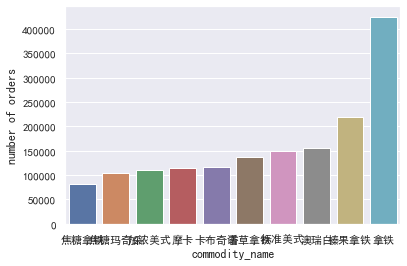

In [17]:
#4-a Draw graphs with x-axis the commodity name and y-axis the # of orders
sns.barplot(x='commodity_name',y='number of orders',data=data4[-10:])

In [18]:
#5 Find the discount rate of each order and concat it onto the original dataset with column name discount_rate.
data['discount_rate']=data['commodity_income']/ data['commodity_origin_money']
data

,Unnamed: 0,Unnamed: 0.1,dt,phone_no,member_id,commodity_code,commodity_name,commodity_origin_money,coupon_id,coupon_money,one_category_name,two_category_name,commodity_income,pay_money,coffeestore_share_money,discount_rate
0,0,0,2019-01-25,13901387938,14442,SP025,榛果拿铁,27.0,7045.0,19.44,饮品,现磨咖啡,7.56,7.56,0.0,0.280000
1,1,1,2019-01-27,13901387938,14442,SP209,NFC鲜榨橙汁,24.0,NaN,0.00,饮品,鲜榨果蔬汁,0.00,0.00,0.0,0.000000
2,2,2,2019-01-23,13901387938,14442,SP025,榛果拿铁,27.0,5589.0,22.14,饮品,现磨咖啡,4.86,4.86,0.0,0.180000
3,3,3,2019-02-01,13901387938,14442,SP025,榛果拿铁,27.0,6604.0,19.44,饮品,现磨咖啡,7.56,7.56,0.0,0.280000
4,4,4,2019-01-27,13901387938,14442,SP010,巧克力瑞纳冰,27.0,6947.0,14.04,饮品,瑞纳冰,12.96,12.96,0.0,0.480000
5,5,5,2019-02-03,13901387938,14442,SP023,香草拿铁,27.0,6604.0,19.44,饮品,现磨咖啡,7.56,7.56,0.0,0.280000
6,6,6,2019-01-24,13901387938,14442,SP008,拿铁,24.0,7038.0,17.28,饮品,现磨咖啡,6.72,6.72,0.0,0.280000
7,7,7,2019-02-02,13901387938,14442,SP209,NFC鲜榨橙汁,24.0,5664.0,14.88,饮品,鲜榨果蔬汁,9.12,9.12,0.0,0.380000
8,8,8,2019-02-02,13901387938,14442,SP344,加浓美式,24.0,6604.0,17.28,饮品,现磨咖啡,6.72,6.72,0.0,0.280000
9,9,9,2019-01-24,17710179294,16404,SP029,焦糖拿铁,27.0,NaN,0.00,饮品,现磨咖啡,9.00,0.00,9.0,0.333333


In [59]:
# P6 Find the average discount of each week. One week should consist of Sunday to Saturday.
data6=data.copy()
holiday=pd.read_csv(r'C:\Users\rcf\Desktop\WISERCLUB\WISERCLUB\holiday.csv',encoding = "UTF-8").iloc[468:509].copy()
data6=data6.groupby('dt').mean().loc[:,'discount_rate']
# data6={'dt':data3.index,'discount':data6.values}
data6=pd.DataFrame(data6)
holiday=holiday.rename(index=holiday.loc[:,'dt']).drop(['dt'],axis=1)
holiday=holiday.loc[:,'week_of_year']
holiday=pd.DataFrame(holiday)
pd.concat([holiday,data6],axis=1).groupby('week_of_year').count()
average_discount=pd.concat([holiday,data6],axis=1).groupby('week_of_year').mean()
#since week3 and week9 contain less than 7 days,we drop them.
average_discount.drop(index=[3,9])
# Another solution:
# data6['timedelta']=0
# data6['week']=0
# for i in range(41):
#     data6.loc[i,'dt']=datetime.strptime(data3.loc[i,'dt'],'%Y-%m-%d')
#     data6.loc[i,'timedelta']=rrule.rrule(freq = rrule.DAILY,dtstart=data3.loc[0,'dt'],until=data3.loc[i,'dt']).count()
# for i in range (41):
#     if data6.loc[i,'timedelta']%7<=6:
#         data6.loc[i,'week']=0
#     elif data6.loc[i,'timedelta']%7<=13:
#         data6.loc[i,'week']=1
#     elif data6.loc[i,'timedelta']%7<=20:
#         data6.loc[i,'week']=2
#     elif data6.loc[i,'timedelta']%7<=27:
#         data6.loc[i,'week']=3
#     elif data6.loc[i,'timedelta']%7<=34:
#         data6.loc[i,'week']=4
#     else:
#         data6.loc[i,'week']=5
# data6.groupby('week').mean().loc[:,'discount']

,discount_rate
week_of_year,
3,1
4,7
5,7
6,7
7,7
8,7
9,5


,discount_rate
week_of_year,
4,0.397367
5,0.420771
6,0.368460
7,0.490635
8,0.486477


In [8]:
#7 rention rate of random 5 days
data7=data2
for i in range(6):
    i=str(i)
    locals()['list'+i]=data7.loc[:,['dt','member_id','number of orders']].groupby(['dt','member_id']).sum().loc['2019-01-2'+i].index
    if int(i)>0: 
        locals()['Retention_rate_of_2019012'+i]=pd.Series(locals()['list'+i]).loc[pd.Series(locals()['list'+i]).isin(locals()['list'+str(int(i)-1)])].shape[0]/len(locals()['list'+i])
        locals()['Retention_rate_of_2019012'+i]

0.08633781128869537

0.24951932773109245

0.2238710502750416

0.22879613447105993

0.2318801494087029

In [18]:
#8
list6=data7.loc[:,['dt','member_id','number of orders']].groupby(['dt','member_id']).sum().loc['2019-02-01'].index
list7=data7.loc[:,['dt','member_id','number of orders']].groupby(['dt','member_id']).sum().loc[['2019-02-02','2019-02-03','2019-02-04','2019-02-05','2019-02-06','2019-02-07','2019-02-08']].reset_index()
list7=pd.Series(list7.loc[:,'member_id'].unique())
week_retention_rate=list7.loc[list7.isin(list6)].shape[0]/len(list6)
week_retention_rate

0.24204875608489024

In [19]:
#9
data8=data7.loc[data7['pay_money']==0]
list8=data8.loc[:,['dt','member_id','number of orders']].groupby(['dt','member_id']).sum().loc['2019-02-01'].index
week_retention_rate_of_new_users=list7.loc[list7.isin(list8)].shape[0]/len(list8)
week_retention_rate_of_new_users

0.18122844953538658

In [39]:
#10
list9=data7.loc[:,['dt','member_id','number of orders']].groupby(['dt','member_id']).sum().loc[['2019-02-09','2019-02-03','2019-02-04','2019-02-05','2019-02-06','2019-02-07','2019-02-08']].reset_index()
list9=pd.DataFrame(data=list9.groupby('member_id').sum().loc[:,'number of orders'],columns=['number of orders'])
list9.loc[list9['number of orders']>1].shape[0]/list9.shape[0]

0.4059667376054229

In [43]:
#11
data9=data7.loc[:,['member_id','number of orders']].groupby('member_id').sum()
data9=pd.DataFrame(data=data9,columns=['number of orders'])
data10=data9.loc[data9['number of orders']>=5]
data10

,number of orders
member_id,
1525,7
1533,12
1557,50
1574,24
1575,139
1594,6
1604,5
1613,21
1624,6


In [44]:
#12
data10.to_csv(r'C:\Users\rcf\Desktop\WISERCLUB\WISERCLUB\ActiveUser.csv')

In [50]:
#13
data10.loc[:,'number of orders'].describe()
data10.loc[:,'number of orders'].var()
data10.loc[:,'number of orders'].skew()
data10.loc[:,'number of orders'].kurt()

count    166308.000000
mean         10.418188
std           7.599244
min           5.000000
25%           6.000000
50%           8.000000
75%          12.000000
max         585.000000
Name: number of orders, dtype: float64

57.74851248055524

6.542468770976487

241.3579866155422